In [1]:
import ROOT
from ROOT import TCanvas, TPad, TFile, TPaveLabel, TPaveText, TH1F, TH2F
from ROOT import gROOT, gBenchmark, gRandom, gSystem, RDataFrame
import numpy as np
import pickle
from sklearn.neighbors import KNeighborsRegressor
from algs import get_model
from algs import random_weights
import matplotlib.pyplot as plt

## Loading Data

This is the fastest way to load root file data into python. First we take it as an RDataFrame and then convert to a NumPy array.

For each physics event we take 
- momentum of incoming particle
- x coordinate of incoming particle
- y coordinate of incoming particle
- z coordinate of incoming particle
- theta angle of incoming particle
- phi angle of incoming particle
- cluster energy associated with the shower generated by the incoming particle

In [2]:
data = RDataFrame("t;1", "FullSim.root").AsNumpy()

In [3]:
X = np.array(
    [
        data["part_p"],
        data["part_x"], 
        data["part_y"],
        data["part_z"],
        data["part_theta"],
        data["part_phi"]
    ]
).transpose()
y = data["cl_E_ecal"]
del data

## Load model

Make sure you have the `algs.py` file in the same directory as the working directory for this notebook. Also make sure the `knn_regr_10M_events_leafsize128_nneighbors10_random_5_vars.pkl` file exists in the same directory and is unzipped.

In [16]:
model = get_model("knn_regr_10M_events_leafsize128_nneighbors10_scaled_random_weights_5_vars.pkl")

In [7]:
X_scaled = scaler.transform(X)

Now we can predict the cluster energy for all the entries in X

In [15]:
pred = model.predict(X)

## Visualizing predictions
First we compare the cluster energy distribution for smaller subsets of the data with similar momentum of the incoming particle

In [10]:
def plot_hist_by_p(n_bins, p_max, plot_seperate = False):
    if not plot_seperate:
        plt.figure(figsize=(16,6))
    for i in range(2,10):
        if plot_seperate:
            plt.figure(figsize=(16,6))
        subset = (X.transpose()[0]>i*1000-100)*(X.transpose()[0]<i*1000+100)
        pred_counts, pred_bins = np.histogram(pred[subset], bins=n_bins, range=(0,p_max))
        obs_counts, obs_bins = np.histogram(obs[subset], bins=n_bins, range=(0,p_max))
        plt.hist(pred_bins[:-1], pred_bins, weights=pred_counts, alpha=0.75)
        plt.hist(obs_bins[:-1], obs_bins, weights=obs_counts, alpha=0.25)
        if plot_seperate:
            plt.show()
    if not plot_seperate:
        plt.show()
        plt.figure(figsize=(16,6))
    for i in range(2,10):
        if plot_seperate:
            plt.figure(figsize=(16,6))
        subset = (X.transpose()[0]>i*1000-100)*(X.transpose()[0]<i*1000+100)
        pred_counts, pred_bins = np.histogram(pred[subset], bins=n_bins, range=(0,p_max))
        obs_counts, obs_bins = np.histogram(obs[subset], bins=n_bins, range=(0,p_max))
        plt.hist(pred_bins[:-1], pred_bins, weights=pred_counts, alpha=0.75)
        plt.hist(obs_bins[:-1], obs_bins, weights=obs_counts, alpha=0.25)
        if plot_seperate:
            plt.yscale('log')
            plt.show()
    if not plot_seperate:
        plt.yscale('log')
        plt.show()

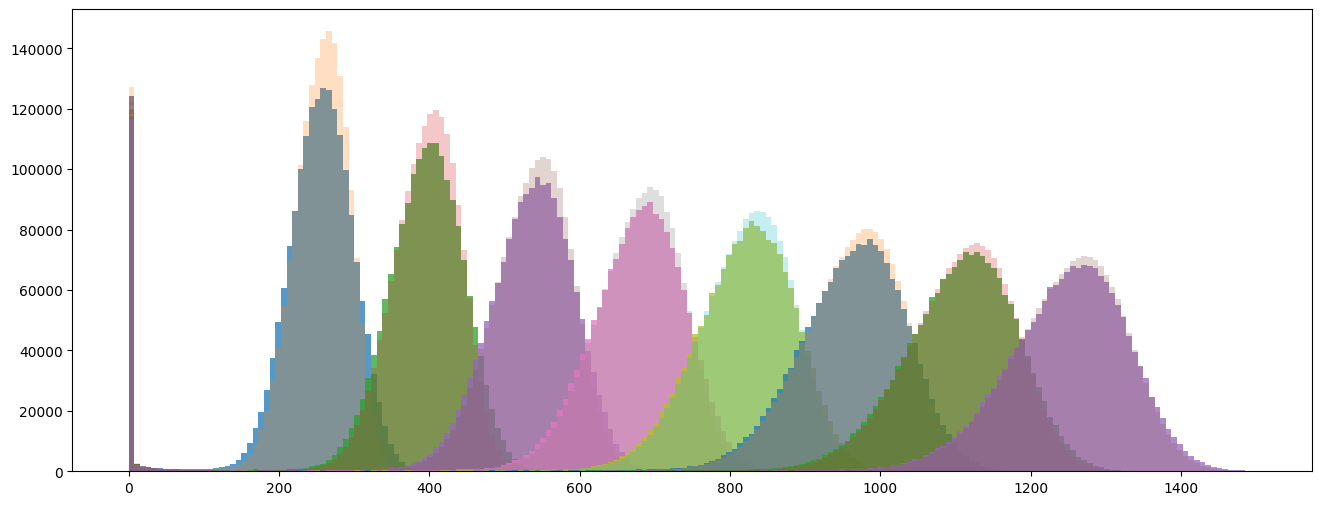

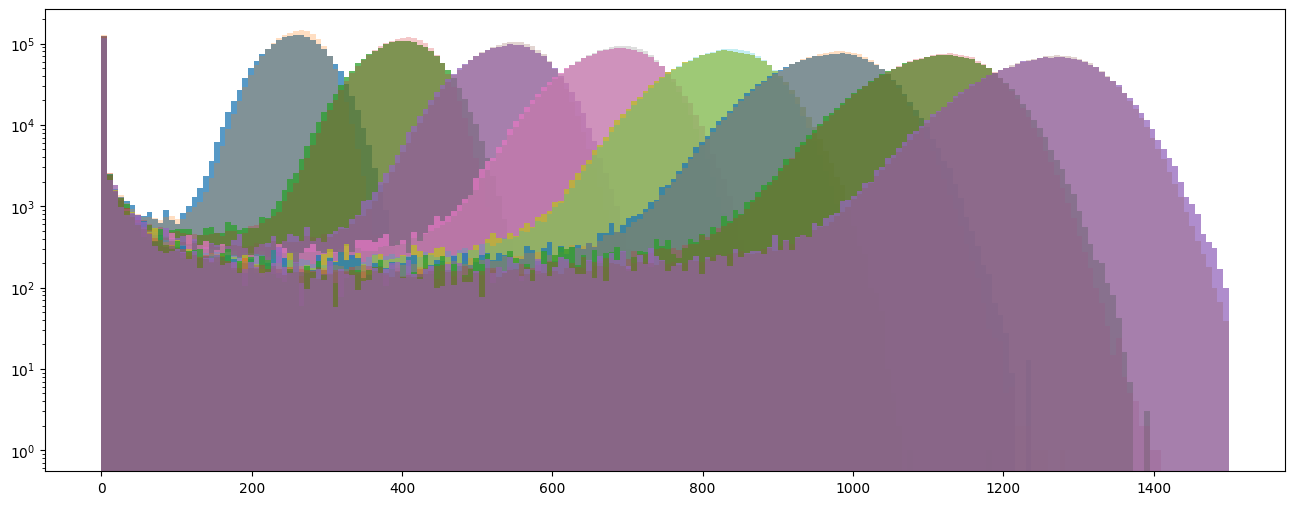

In [13]:
plot_hist_by_p(200, 1500)

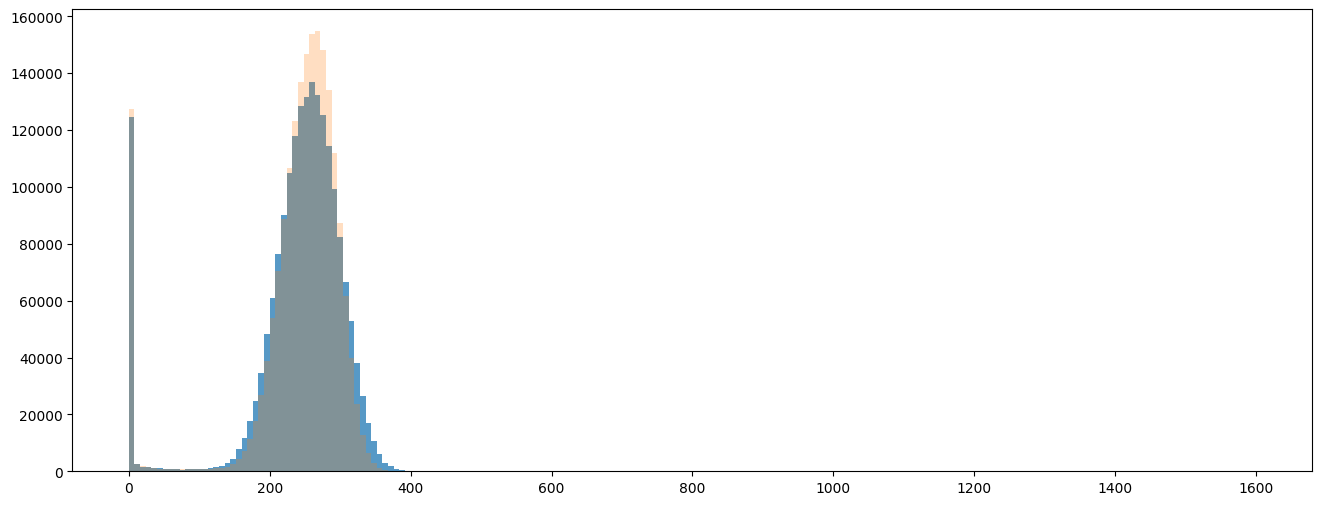

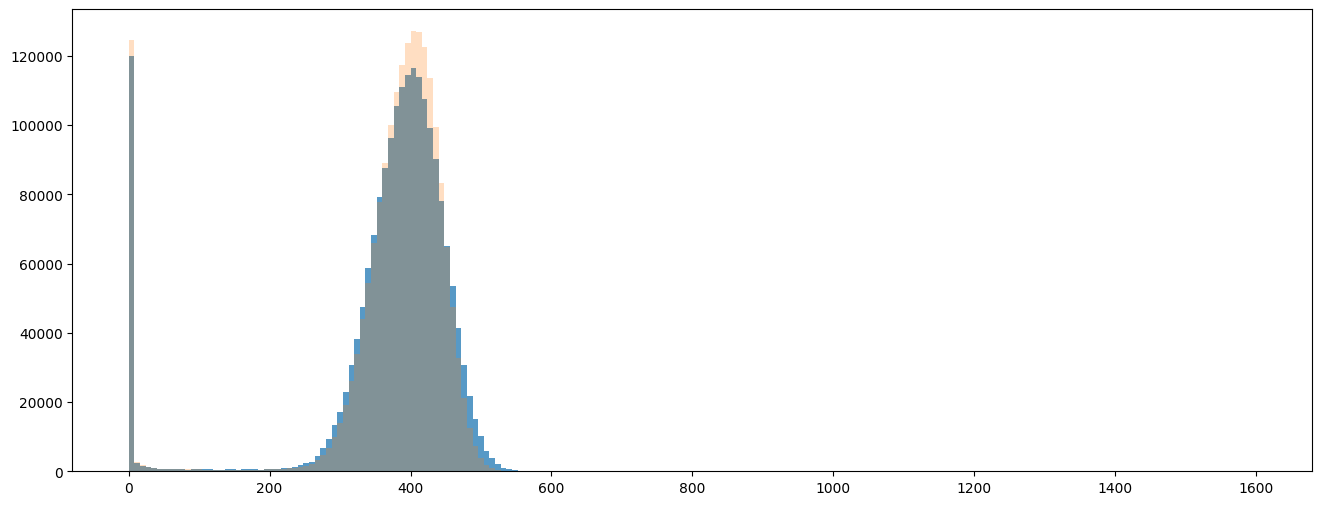

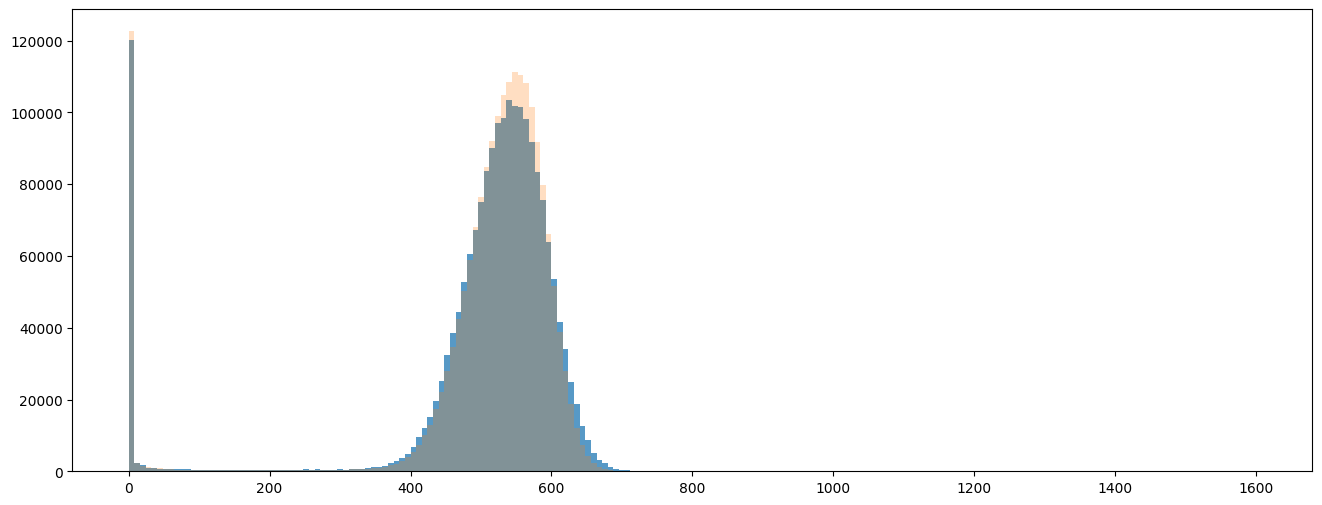

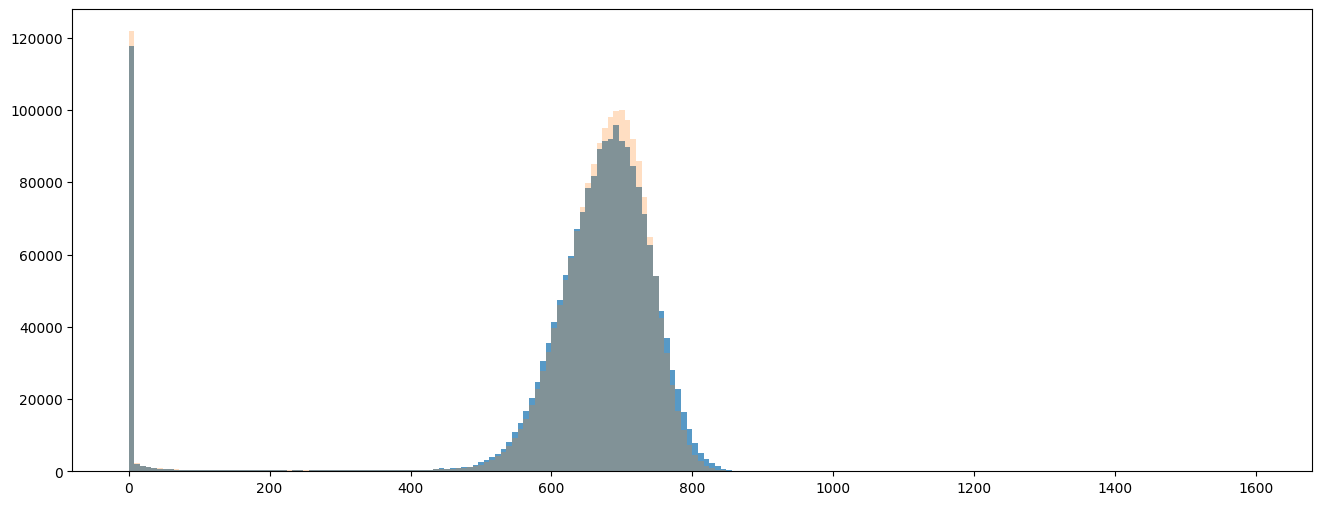

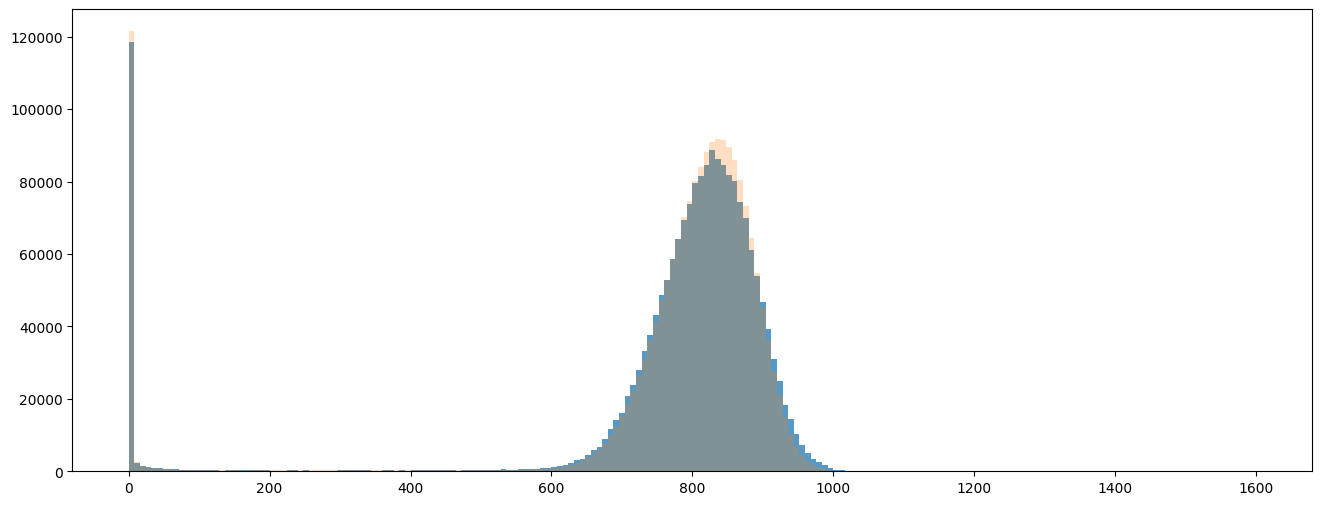

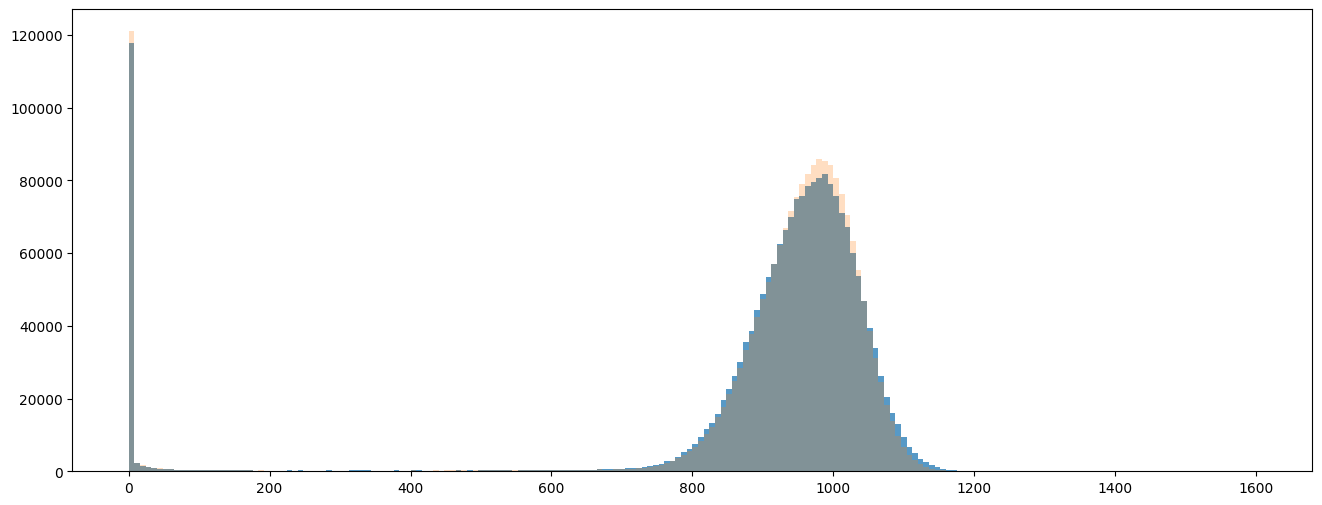

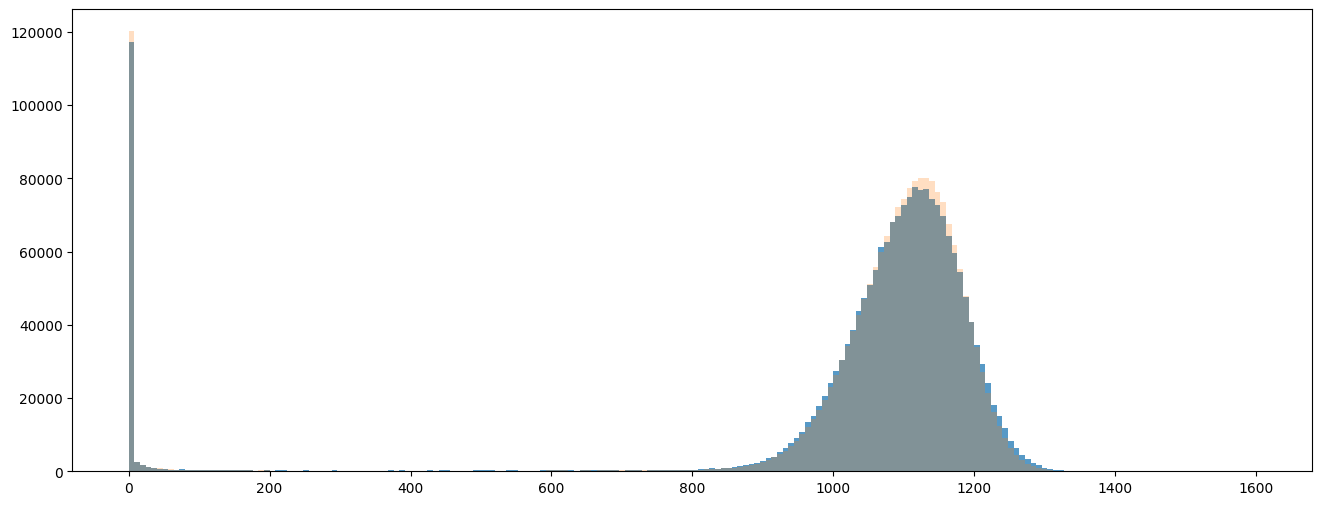

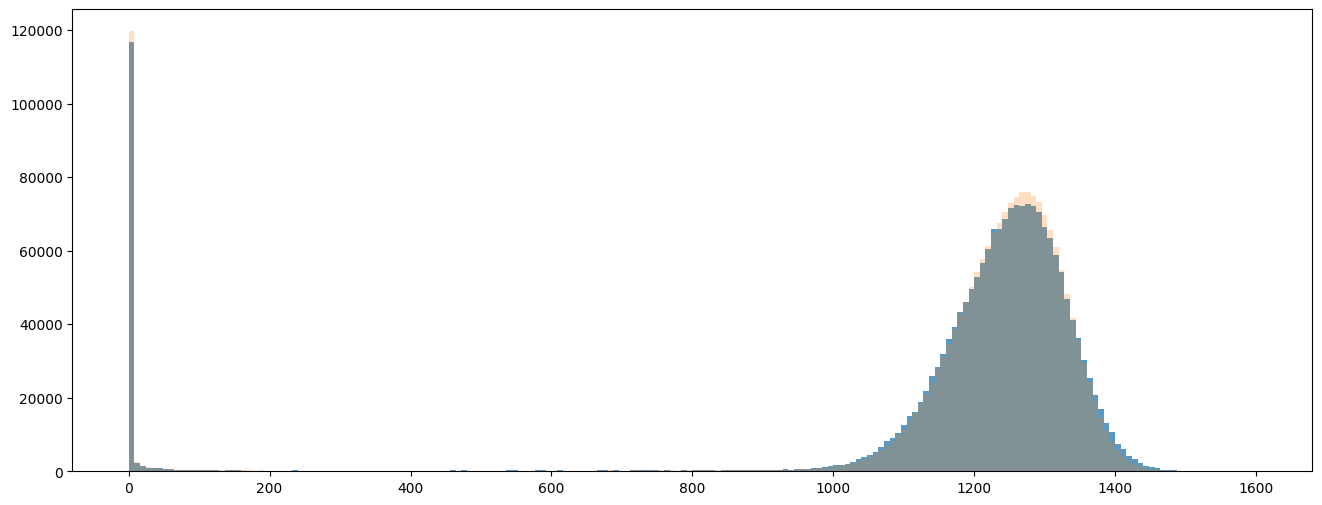

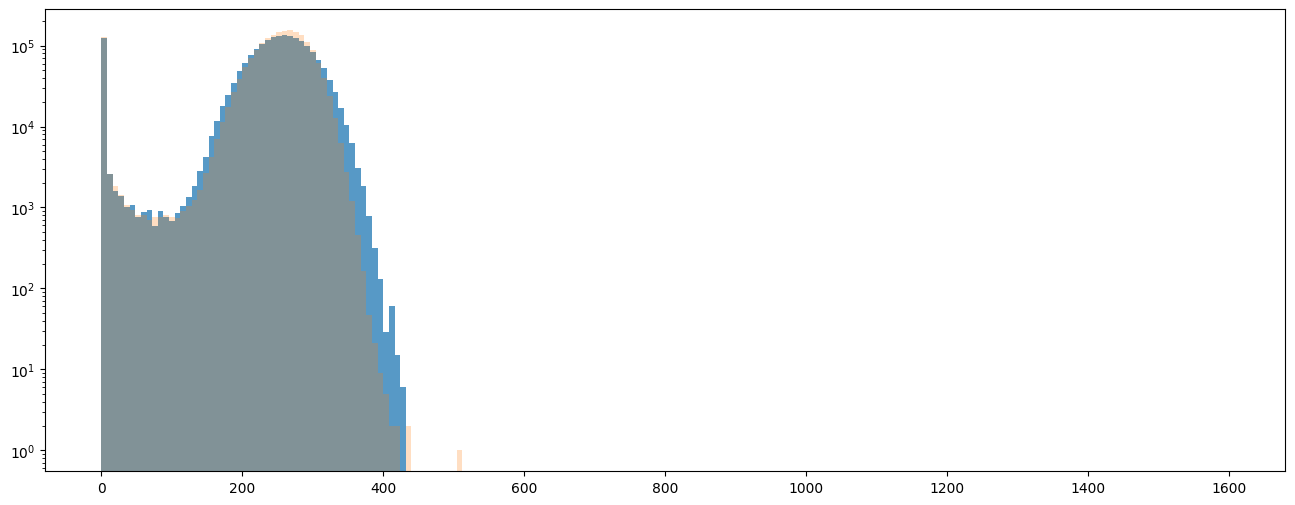

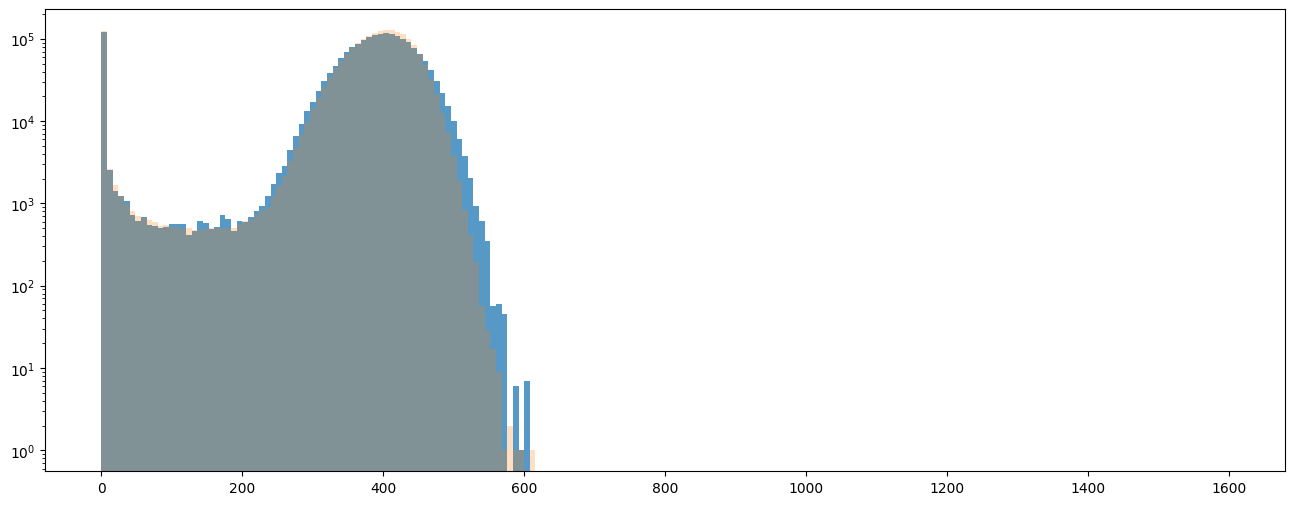

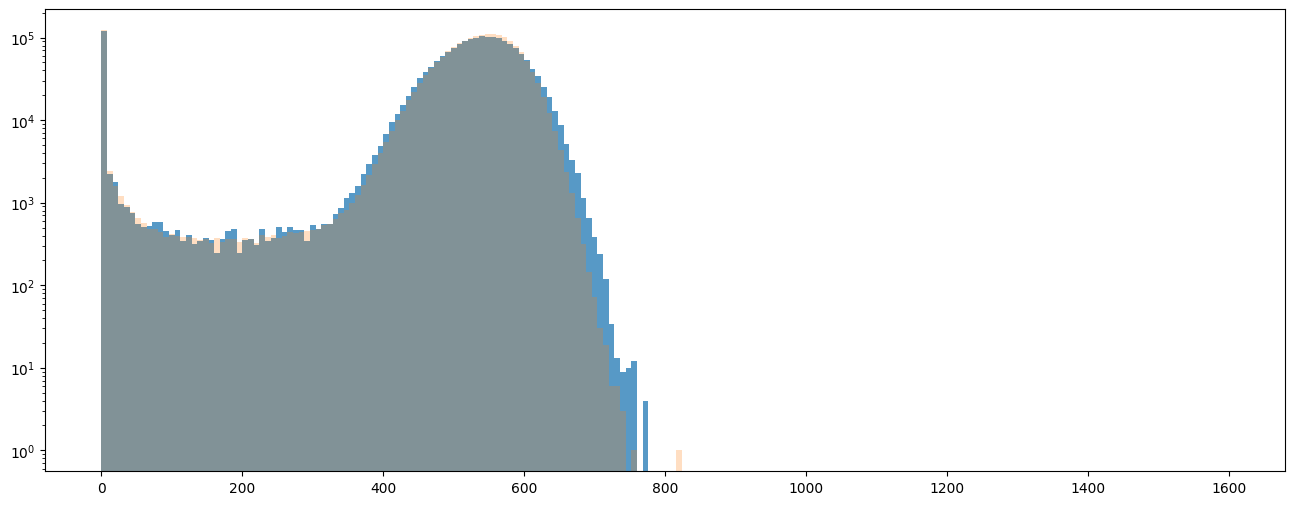

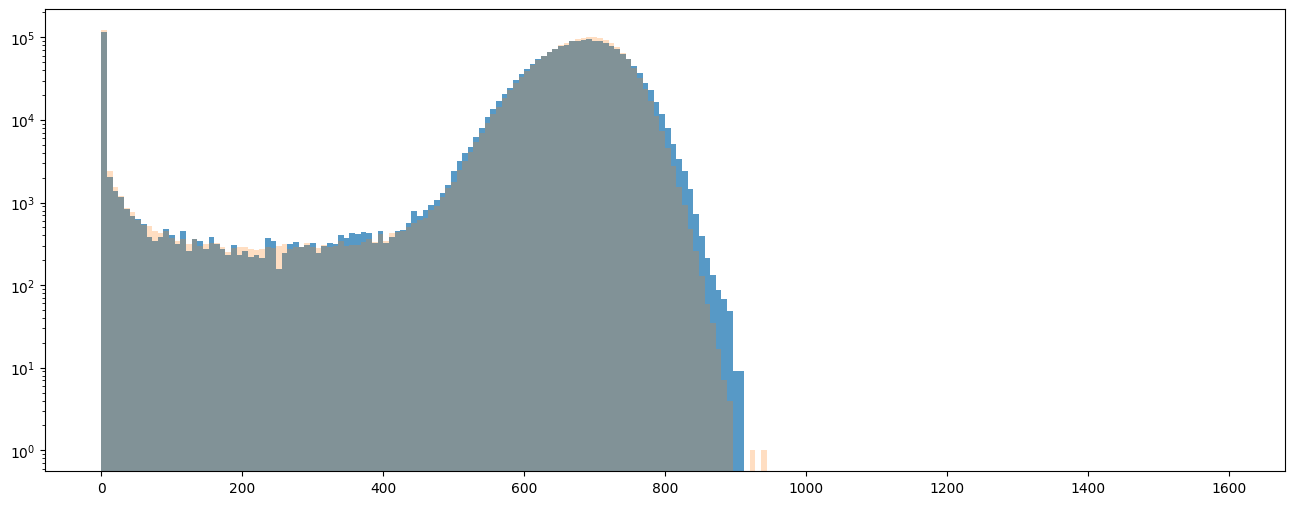

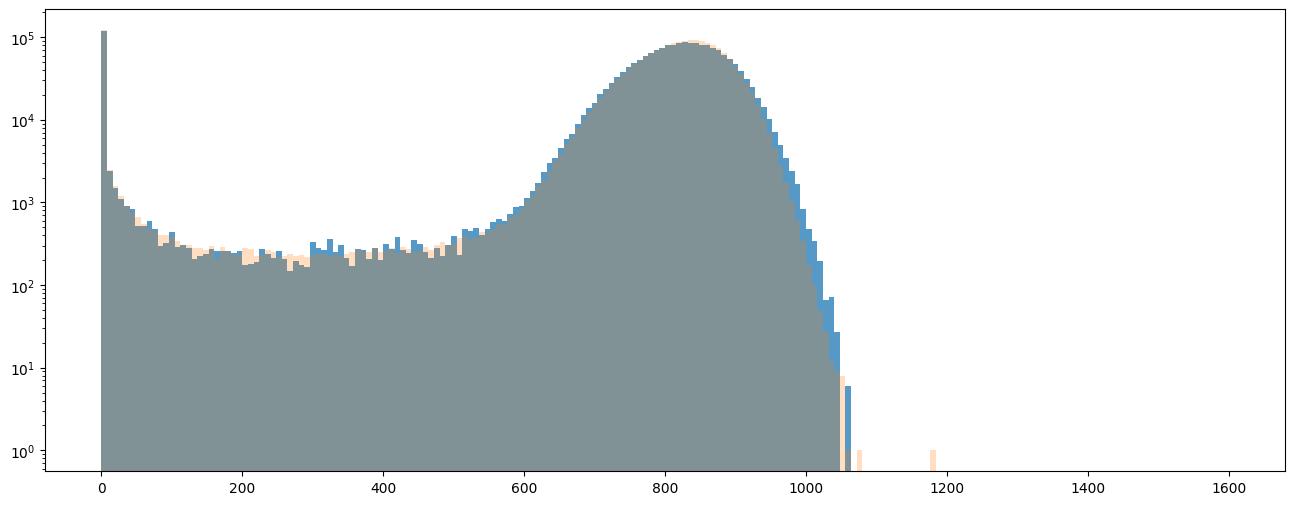

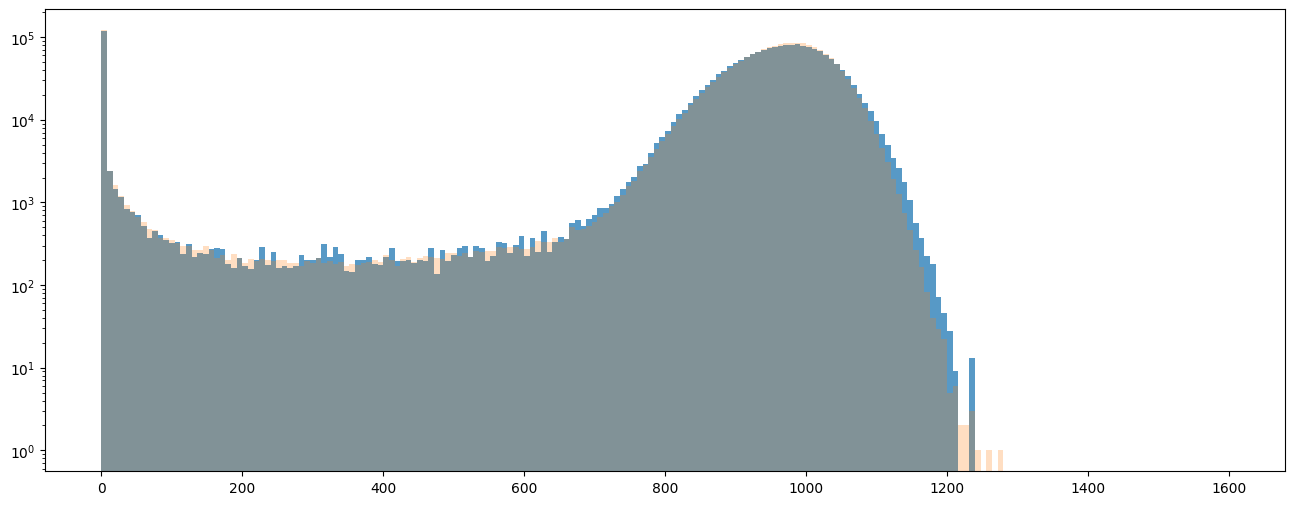

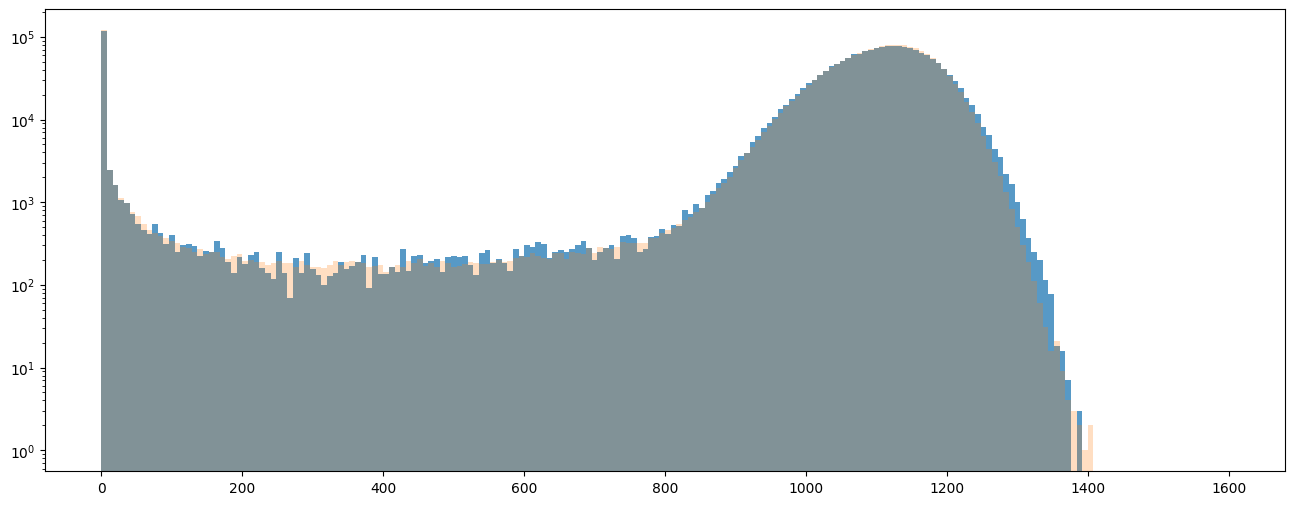

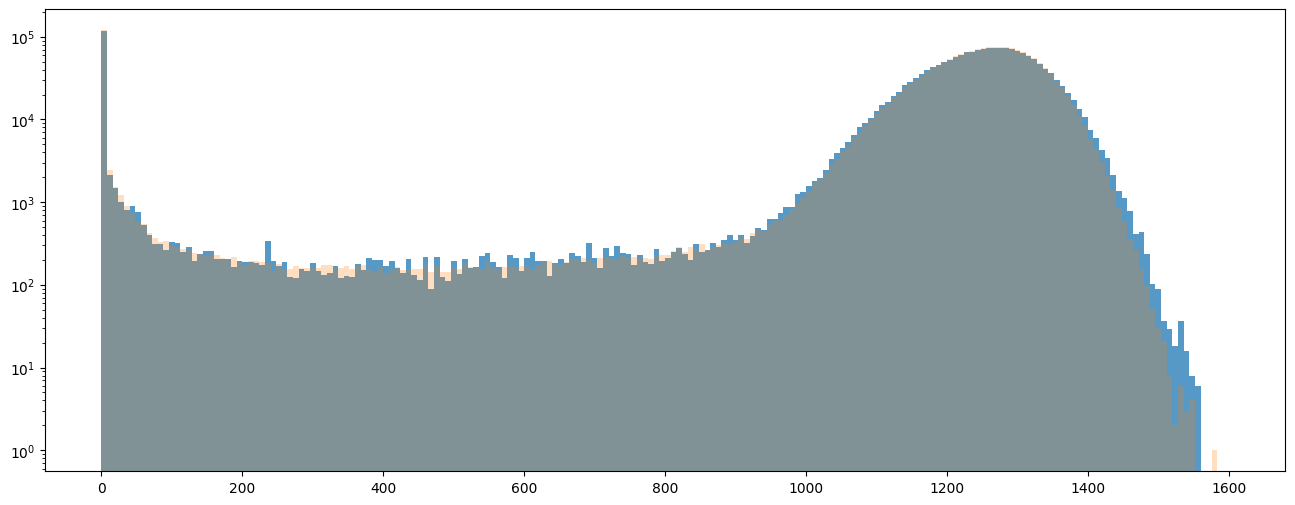

In [14]:
plot_hist_by_p(200, 1600, plot_seperate = True)

In [16]:
errors = abs(obs-pred)

In [17]:
def plot_hist_by_err(n_bins, p_max, plot_seperate = False):
    if not plot_seperate:
        plt.figure(figsize=(16,6))
    for i in range(2,10):
        if plot_seperate:
            plt.figure(figsize=(16,6))
        subset = (X.transpose()[0]>i*1000-100)*(X.transpose()[0]<i*1000+100)
        err_counts, err_bins = np.histogram(errors[subset], bins=n_bins, range=(0,p_max))
        plt.hist(err_bins[:-1], err_bins, weights=err_counts, alpha=0.75)
        if plot_seperate:
            plt.show()
    if not plot_seperate:
        plt.show()

Now we can look at the error distribution for each momentum bin

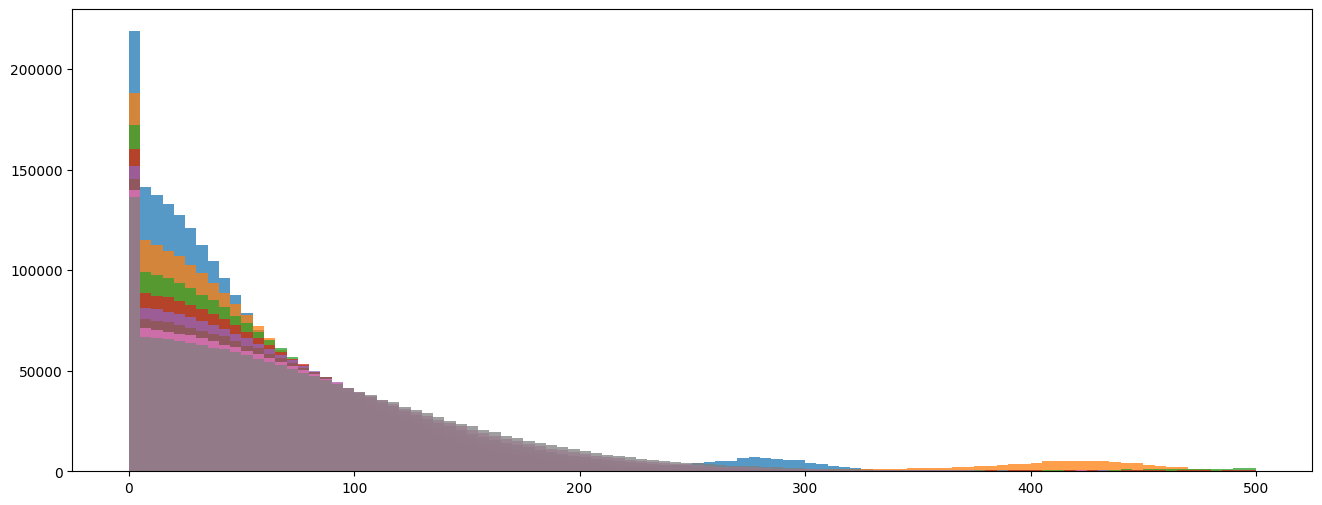

In [21]:
plot_hist_by_err(100, 500)

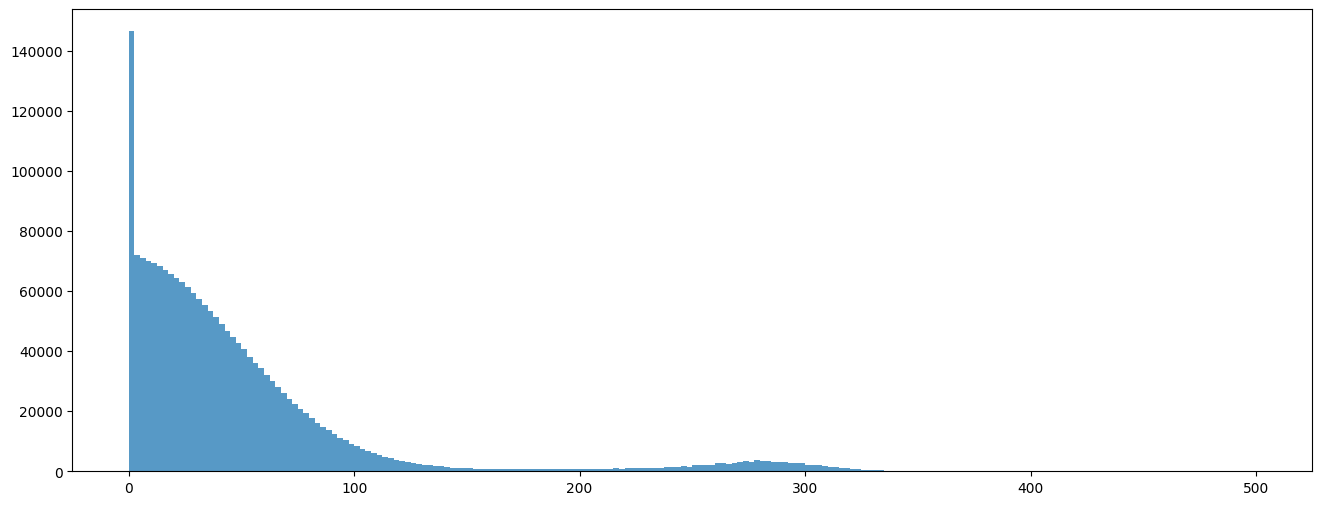

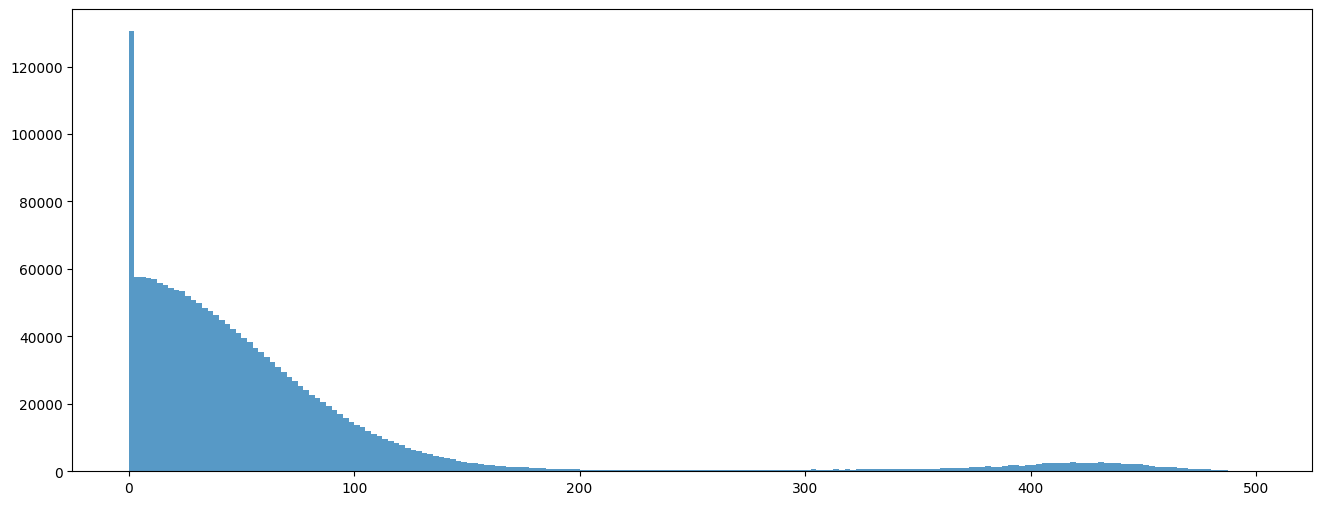

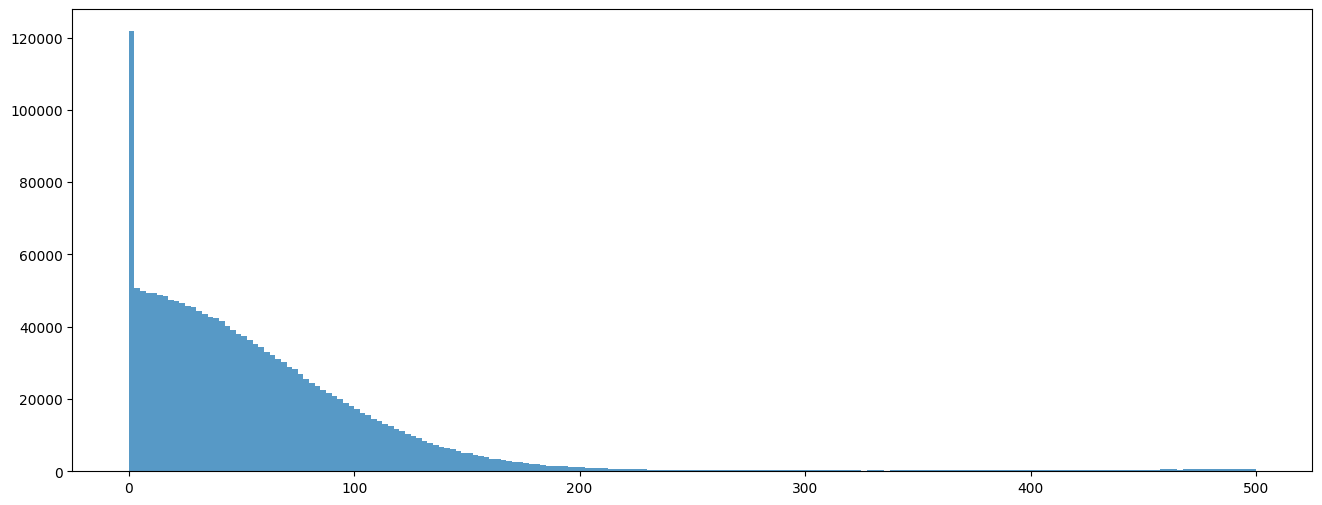

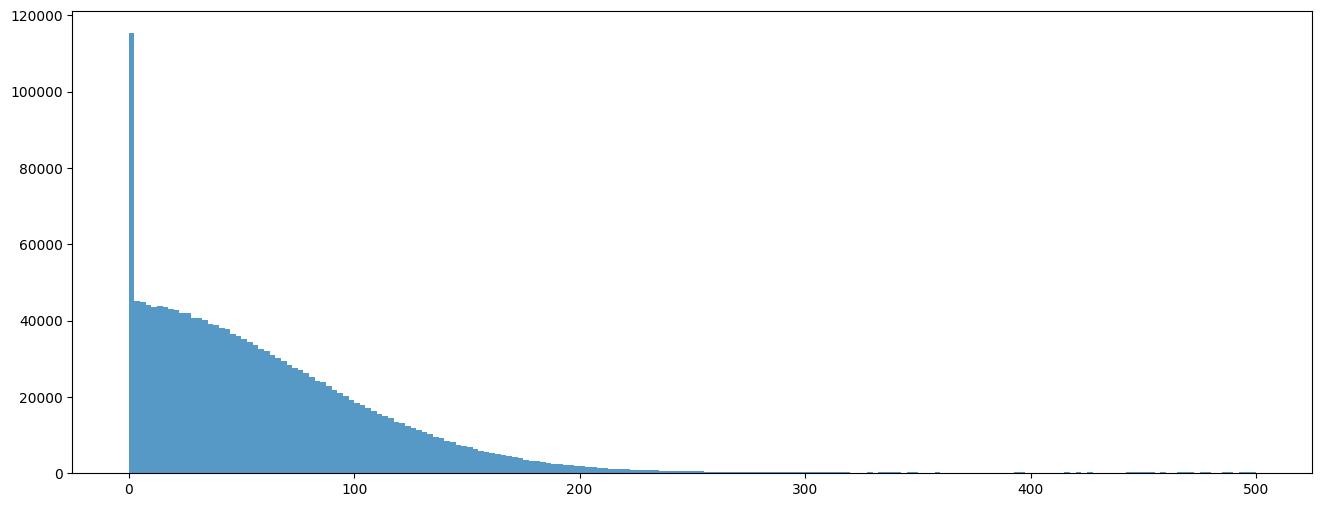

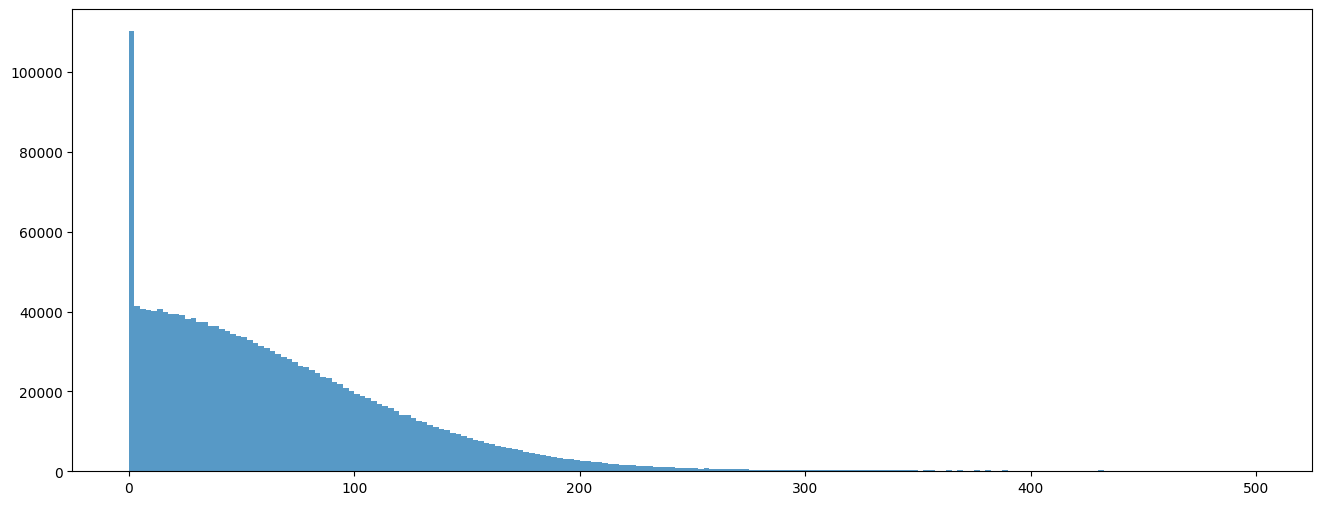

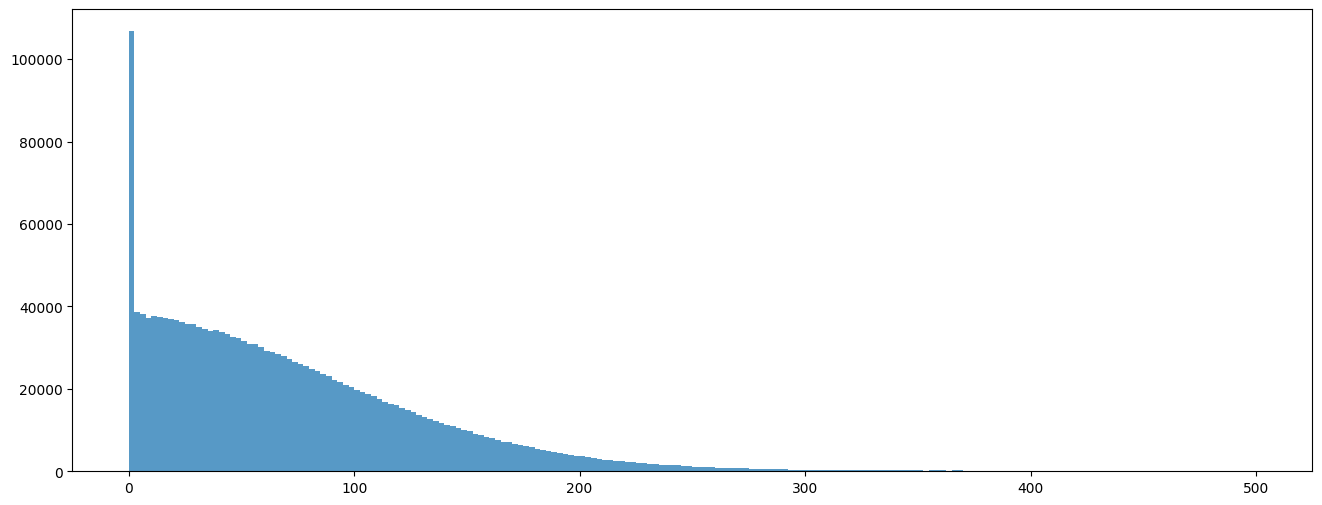

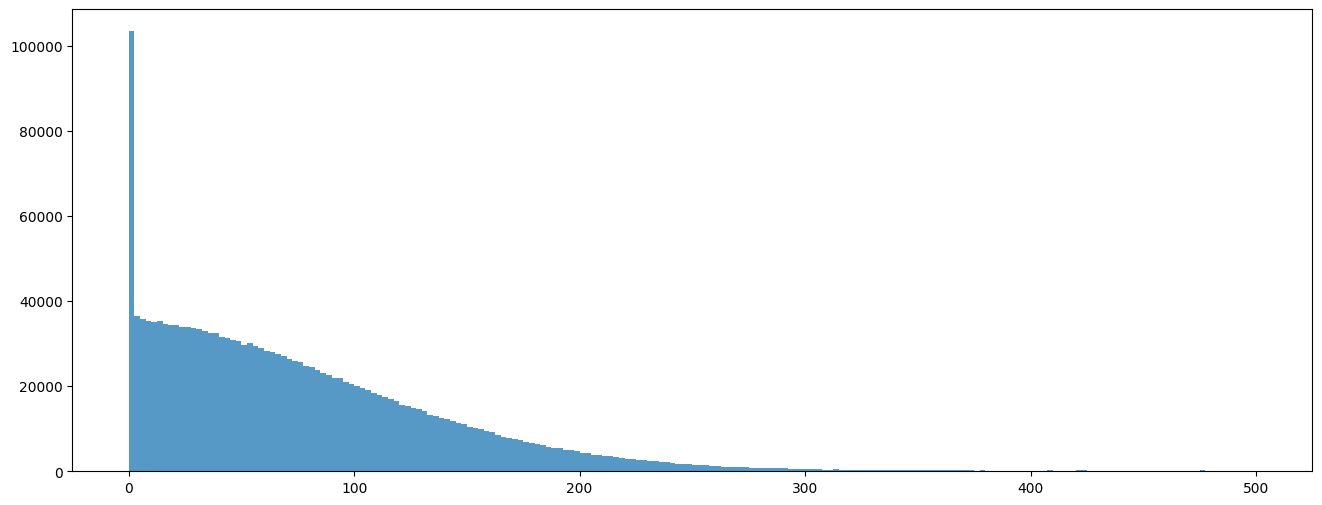

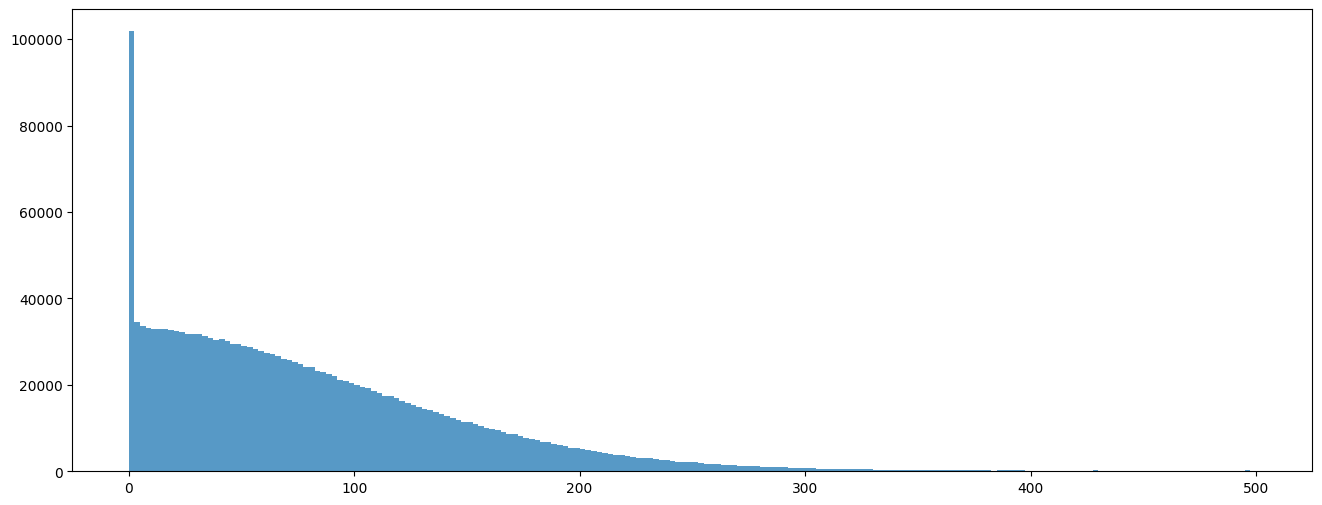

In [23]:
plot_hist_by_err(200, 500, plot_seperate = True)

In [46]:
def plot_hist_by_phi(n_bins, p_max, plot_seperate = False):
    if not plot_seperate:
        plt.figure(figsize=(16,6))
    for i in range(1,6):
        if plot_seperate:
            plt.figure(figsize=(16,6))
        subset = (X.transpose()[4]>i*0.1 - 0.05)*(X.transpose()[4]<i*0.1+0.05)
        pred_counts, pred_bins = np.histogram(pred[subset]/X.transpose()[0][subset], bins=n_bins, range=(0,p_max))
        obs_counts, obs_bins = np.histogram(obs[subset]/X.transpose()[0][subset], bins=n_bins, range=(0,p_max))
        plt.hist(pred_bins[:-1], pred_bins, weights=pred_counts, alpha=0.75)
        plt.hist(obs_bins[:-1], obs_bins, weights=obs_counts, alpha=0.25)
        if plot_seperate:
            plt.show()
    if not plot_seperate:
        plt.show()
        plt.figure(figsize=(16,6))
    for i in range(1,6):
        if plot_seperate:
            plt.figure(figsize=(16,6))
        subset = (X.transpose()[4]>i*0.1 - 0.05)*(X.transpose()[4]<i*0.1+0.05)
        pred_counts, pred_bins = np.histogram(pred[subset]/X.transpose()[0][subset], bins=n_bins, range=(0,p_max))
        obs_counts, obs_bins = np.histogram(obs[subset]/X.transpose()[0][subset], bins=n_bins, range=(0,p_max))
        plt.hist(pred_bins[:-1], pred_bins, weights=pred_counts, alpha=0.75)
        plt.hist(obs_bins[:-1], obs_bins, weights=obs_counts, alpha=0.25)
        if plot_seperate:
            plt.yscale('log')
            plt.show()
    if not plot_seperate:
        plt.yscale('log')
        plt.show()

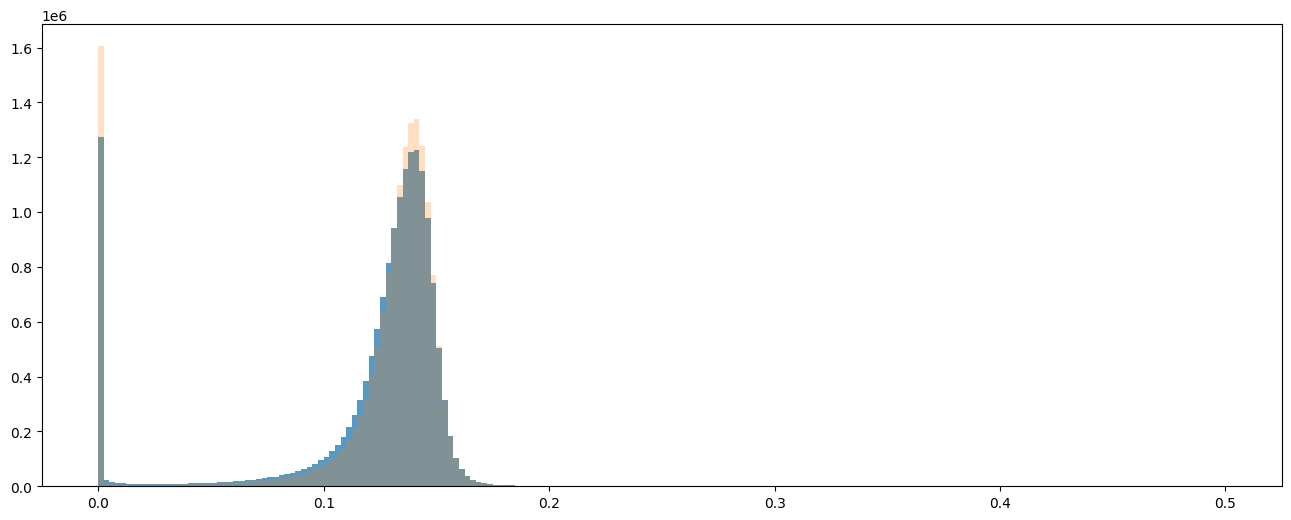

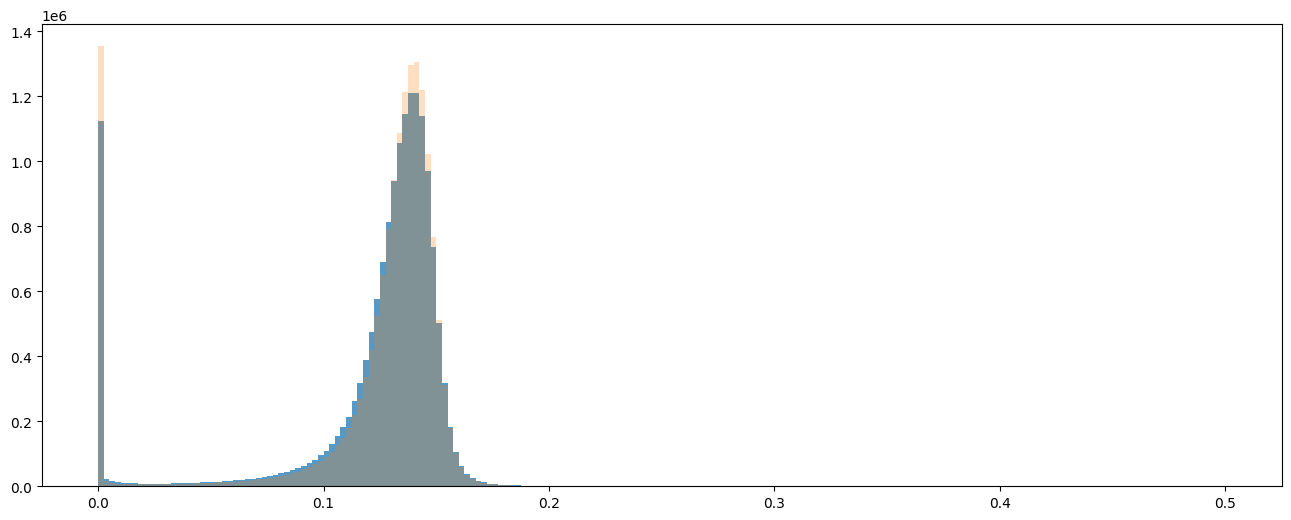

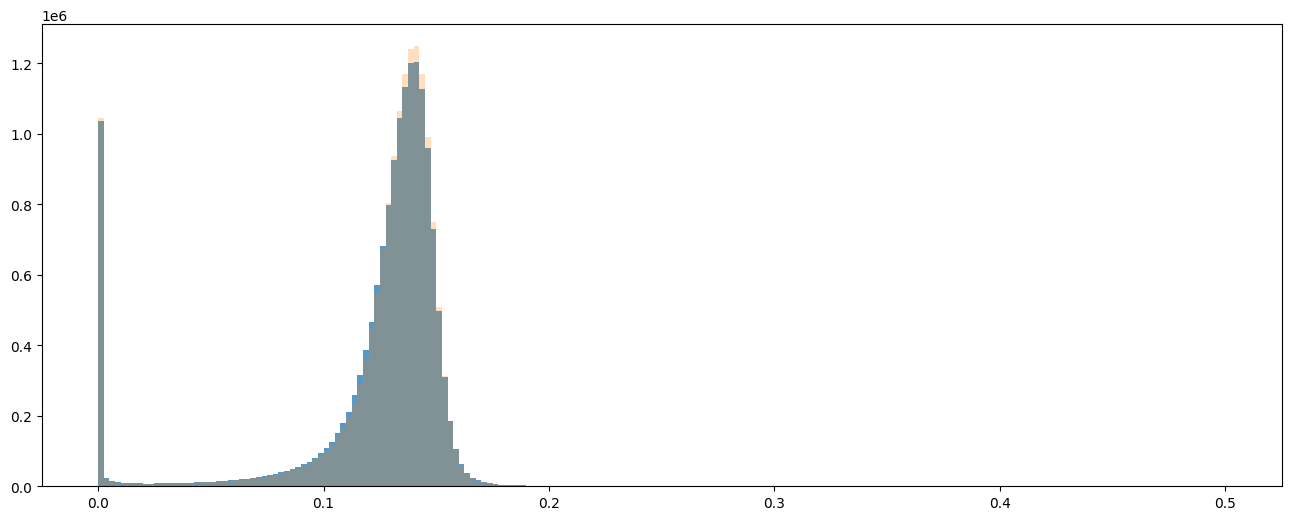

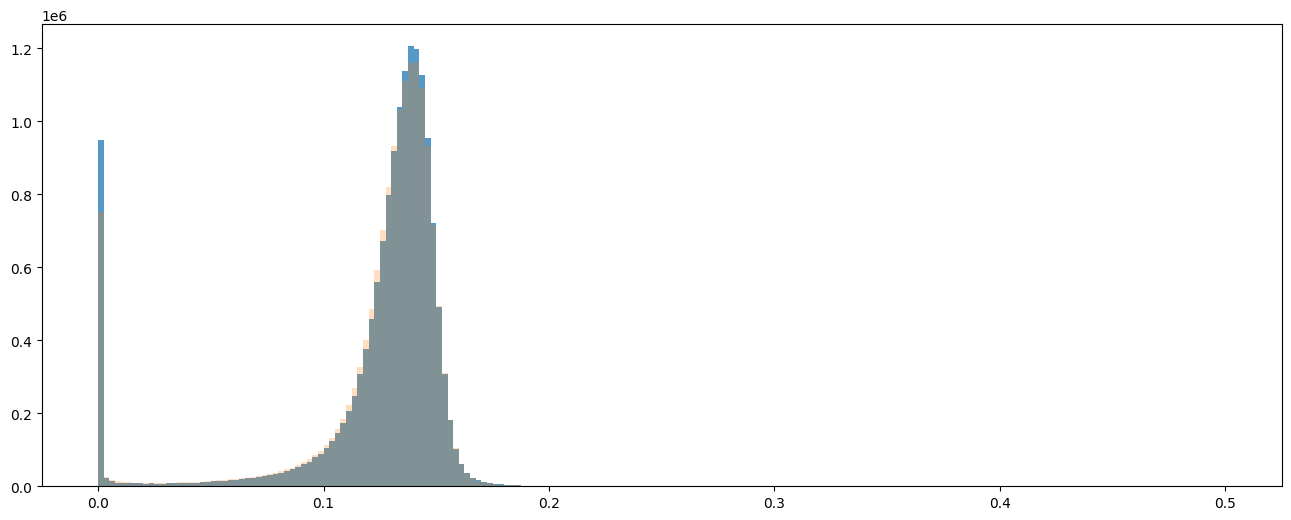

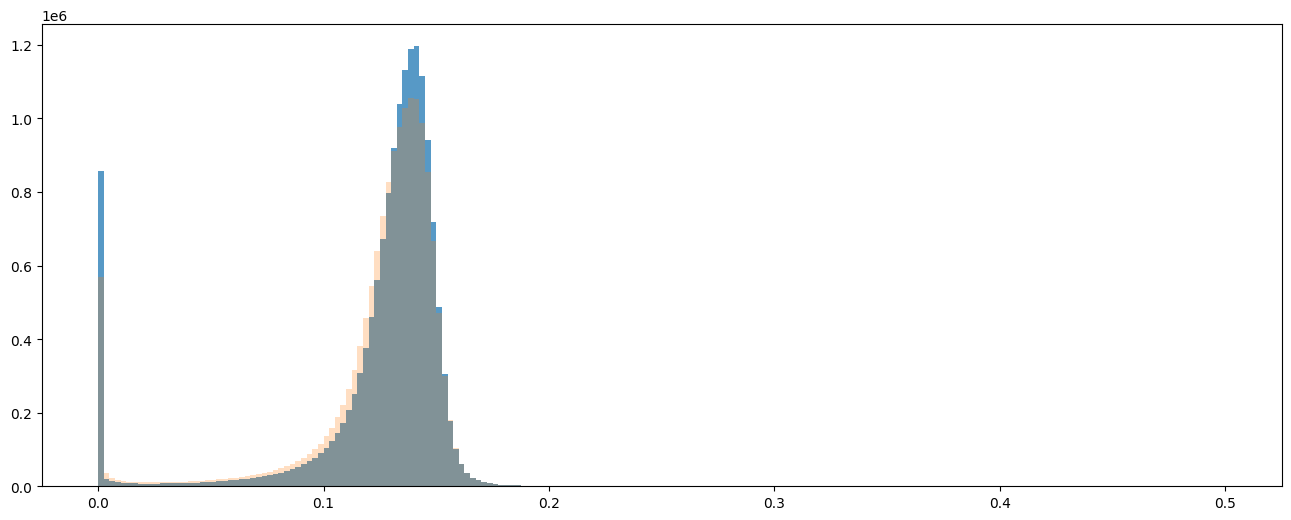

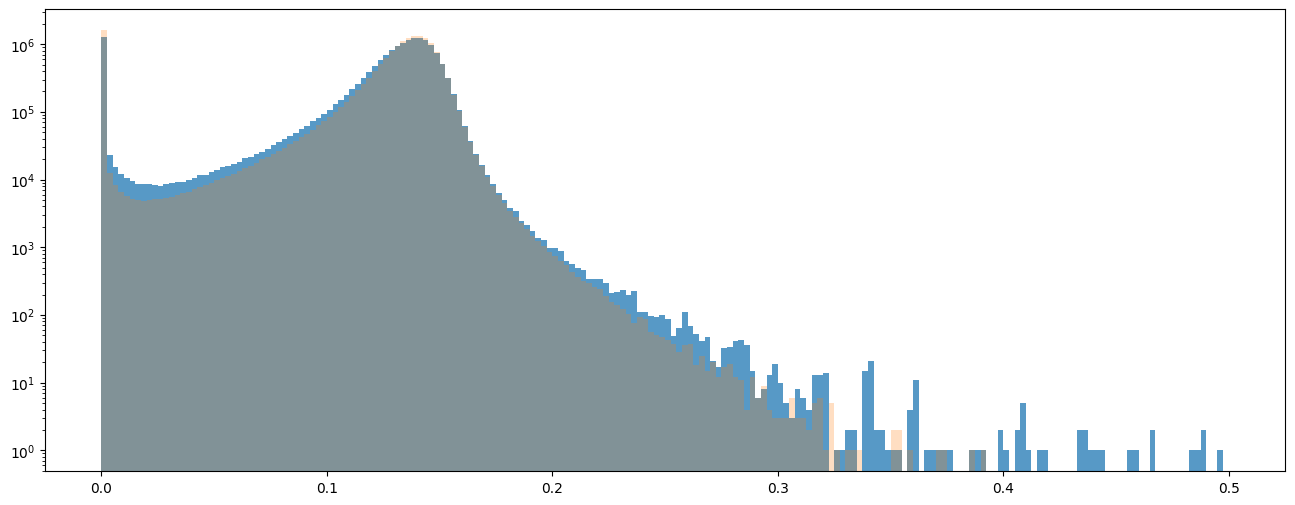

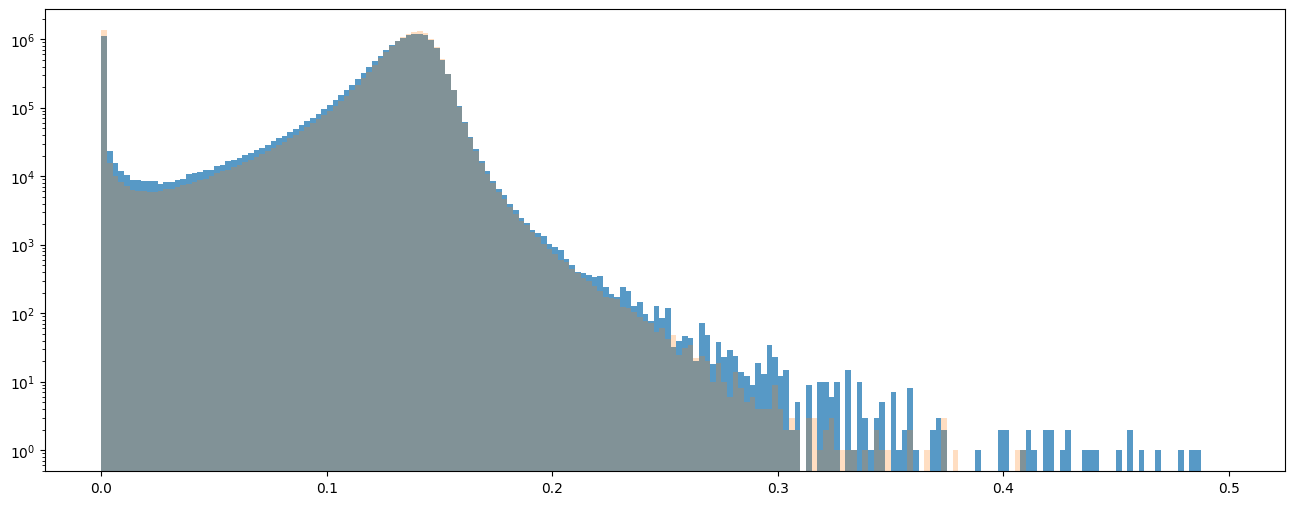

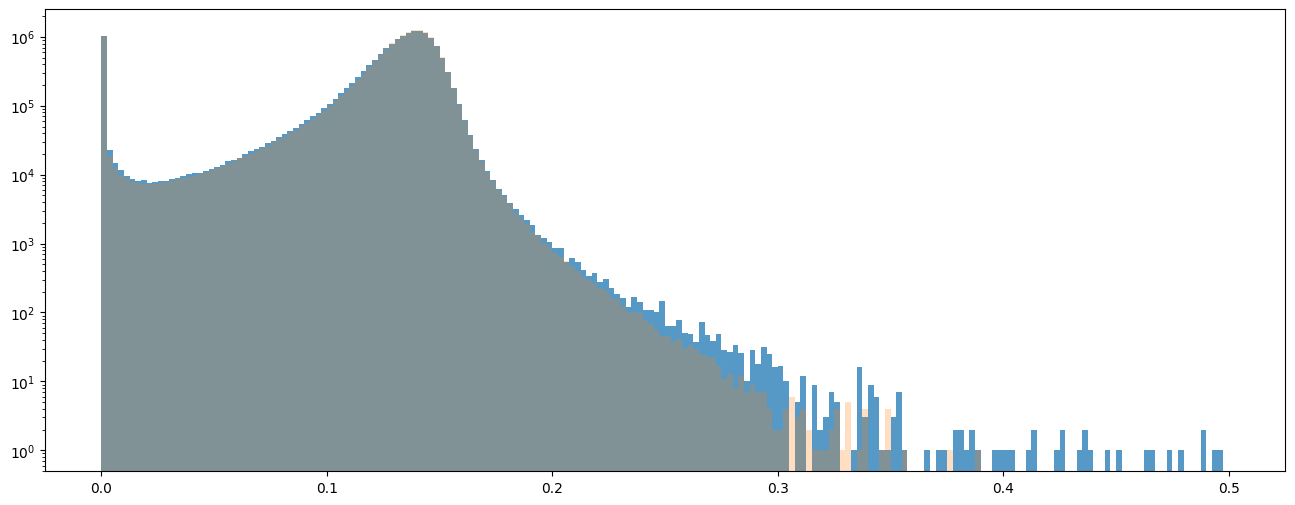

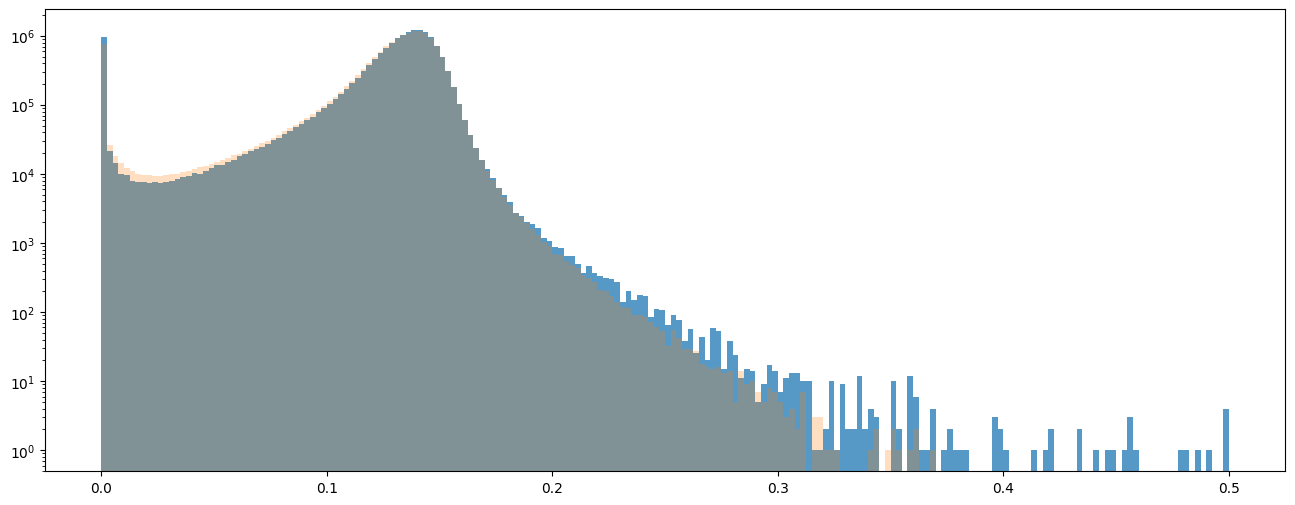

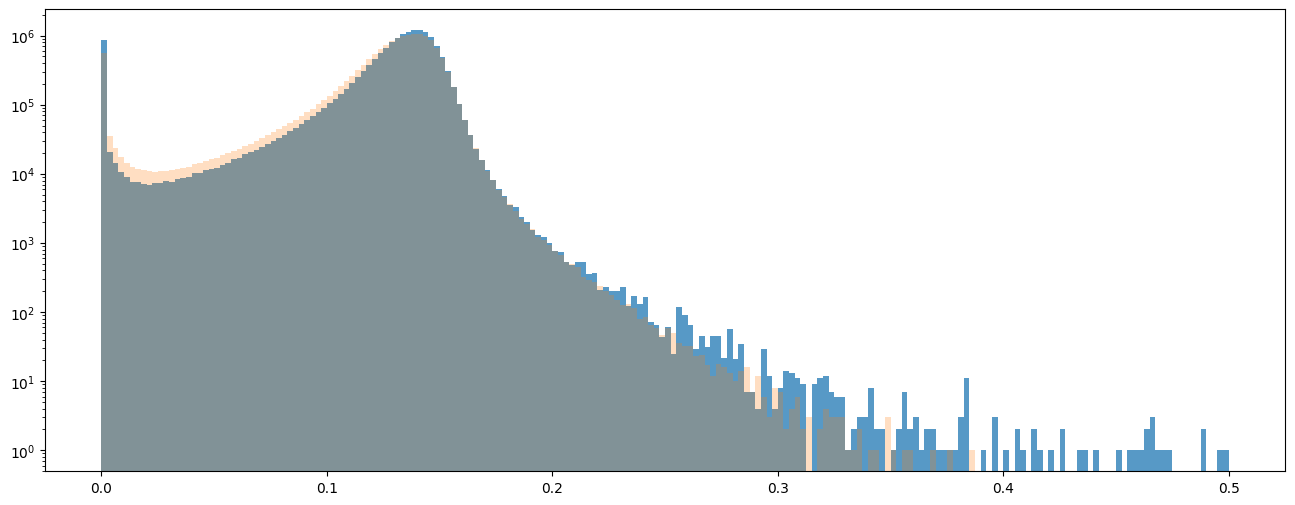

In [47]:
plot_hist_by_phi(200, 0.5, plot_seperate = True)

In [54]:
pred

array([2.54414988, 2.54414988, 2.54414988, ..., 2.54414988, 2.54414988,
       2.54414988])